<h1 style="text-align: center;">Analyses d'un carrousel</h1>

# Préparation

## Imports des modules et configuration de base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# on utilise le style graphique de Seaborn avec un arrière plan de légendes blanc
# fonction set_theme() pour versions à partir de 0.11
if ((int(sns.__version__.split('.')[0]) > 0) or (int(sns.__version__.split('.')[1])) > 10):
    sns.set_theme({'legend.facecolor': 'white'})
# fonction set() jusque version 0.10    
else:
    sns.set({'legend.facecolor': 'white'})

### # import du package `carrouselsAnalysis` et des classes, et tracks préconfigurées 

In [2]:
# on importe le package complet `carrouselsAnalysis
import carrouselsAnalysis

# on importe les classes Track et Carrousel du module `data`
from carrouselsAnalysis.carrousel import Track, Carrousel

TODO classe Carrousel:
- gestion d'un format de données par défaut pour le carrousel (FABISIS ou MG)

**NOTE pour l'utilisateur**:
- si nécessaire, changer le nom de la track préconfigurée à importer ci-dessous, après la mention `import`

In [3]:
# on importe la configuration de track LilleL1 pré-configurée dans le module `tracks`
from carrouselsAnalysis.tracks import LilleL1

# Création de la track et d'une instance de carrousel

**NOTE pour l'utilisateur**:
- adapter ci-dessous le chemin des données ainsi que les éléments `source` et `contexte` du carrousel
- ajouter une référence (textuelle) de `build` s'il ne s'agit pas d'une version officielle

In [4]:
# chemin des données à importer en local
chemin_data = './data/FIVP/Lille_FLUENCE_DATA-FIVP-2022-09-16__v2.xlsx'

# source des données. Typiquement 'FIVP' ou 'Site'
source = 'FIVP'

# contexte du carrousel. Typiquement 'mono-train' ou 'multi-trains'
contexte = 'multi-trains'

# référence du build utilisé (si non officiel, sinon la SoftwareVersion utilisée est celle extraite de l'OMAP)
build = None

**NOTE pour l'utilisateur**:
- changer la référence de la track préconfigurée utilisée ci-dessous si ce n'est pas LilleL1

In [5]:
# création de la track LilleL1
track_1 = Track(LilleL1)

Track créée


In [6]:
# création du carrousel
carrousel_1 = Carrousel(track=track_1, source=source, context=contexte, dataPath=chemin_data, build=build)

Carrousel créé


## Import des données

utilisation des méthodes `get_movement`, `get_EB`

In [7]:
# on importe les données de mouvement
carrousel_1.get_movement()

18066 mouvements importés


TODO METHOD `get_movement`:
- gestion du format d'input (FABISIS ou MG) en écrasement du format hérité du carrousel et renommage systématique de toutes les colonnes utilisées pour éviter le besoin de modifier les fonctions ultérieurement
- renommer la colonne stopStation en enlevant les `_0` et `_1` et en définissant une colonne `amont/aval`
- utiliser la colonne `SW version` pour définir un attribut de classe `version` qui pourra être hérité
- à corriger : l'utilisation en dur de `Start_Station` et `Stop_Station`

In [8]:
# on importe les données de freinage d'urgence
carrousel_1.get_EB()

42 EB en mouvement importés


TODO METHOD `get_EB`:
- récupérer la `version` de la classe carrousel
- gestion du format d'input (FABISIS ou MG) en écrasement du format hérité du carrousel et renommage systématique de toutes les colonnes utilisées pour éviter le besoin de modifier les fonctions ultérieurement

# Graphiques & indicateurs

TODO pour toutes les méthodes graphiques:
- option legend true/false
- gestion position légende
- gestion taille du/des titre, axes x et y, ticks, texte légende

## Histogramme de précision globale de pilotage ATO

À FAIRE

## Arrêts ratés

À FAIRE

### Au global

### Par station

### Par train

### Par période de temps

## Précision d'arrêt par station

### Précision moyenne

Note:
- pour ajouter un intervalle de confiance basé sur l'écart type, utiliser `ci='sd'`

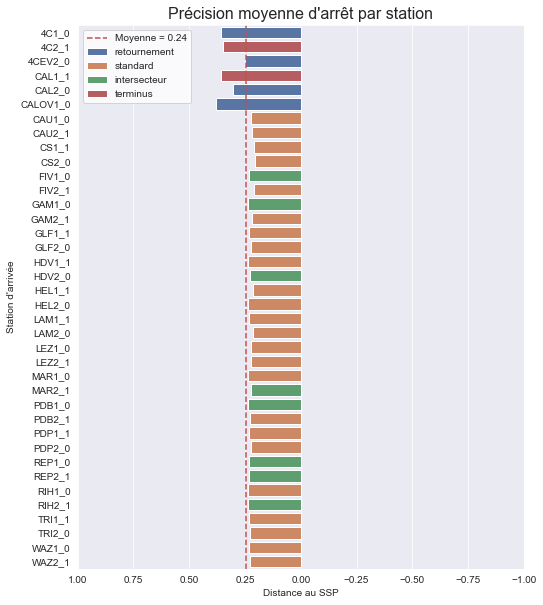

In [9]:
carrousel_1.trace_precision_station()

### Dispersion des arrêts par station

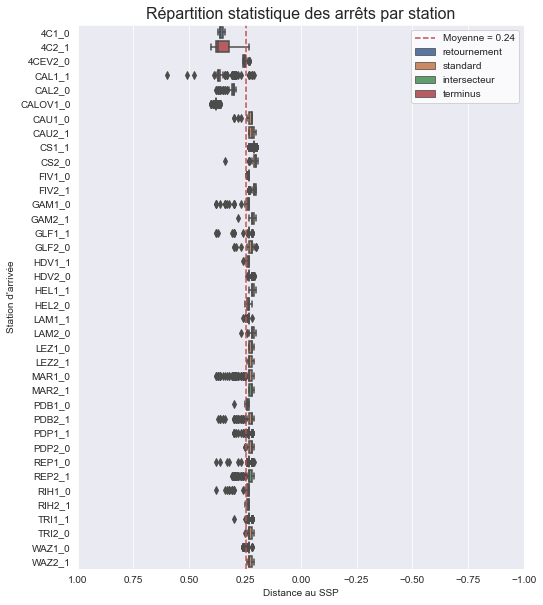

In [10]:
carrousel_1.trace_dispersion_station()

## Précision d'arrêt par train

### Précision moyenne par train

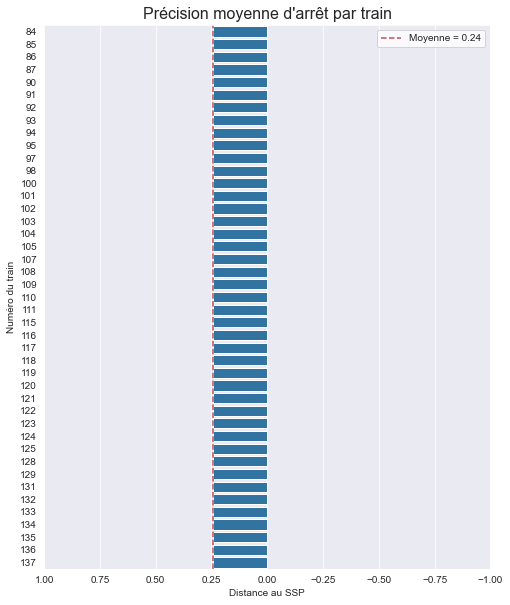

In [11]:
carrousel_1.trace_precision_train()

### Dispersion par train

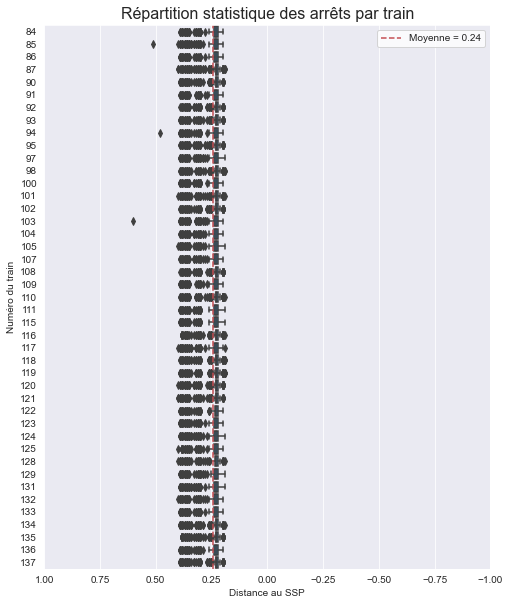

In [12]:
carrousel_1.trace_dispersion_train()

## Temps de parcours

Note TODO:
- gestion du carrousel nominal seulement (par défaut) via les `PexMovements` de la track

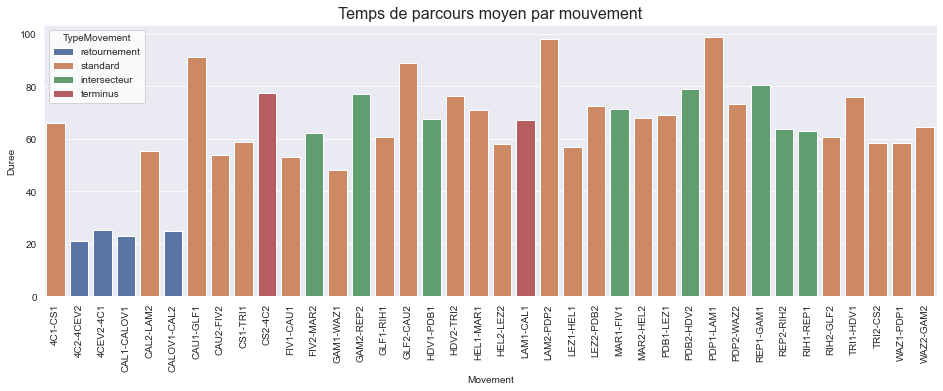

In [13]:
carrousel_1.trace_tps_parcours()

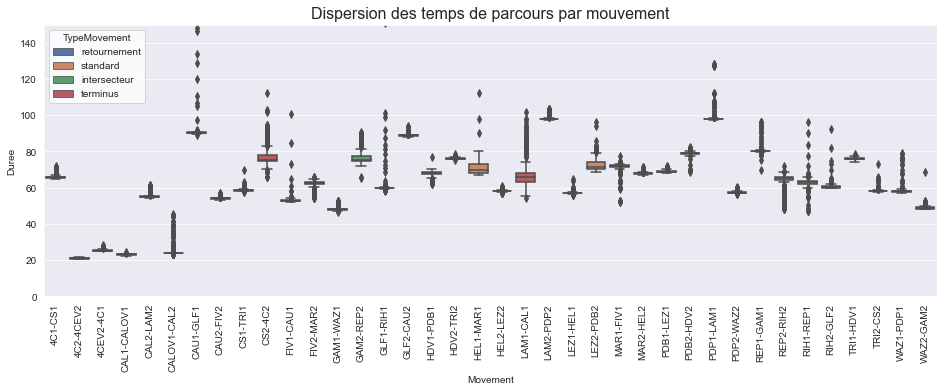

In [14]:
carrousel_1.trace_disp_tps_parcours(ylim=(0,150))

## Temps de parcours comparés mono-train vs multi-trains

À FAIRE

## Vitesse commerciale

À FAIRE: utilisation des `PexMovements` de la track

### Vitesse commerciale moyenne par voie

### Vitesse commerciale avec les temps de parcours mini

## Freinages d'urgence

### Répartition des freinages d'urgence par mouvement

#### y compris par type de mouvement (HLP, PEX, ??)

### Répartition des freinages d'urgence par KP

Note TODO:
- possibilité de définir la plage de KP à représenter

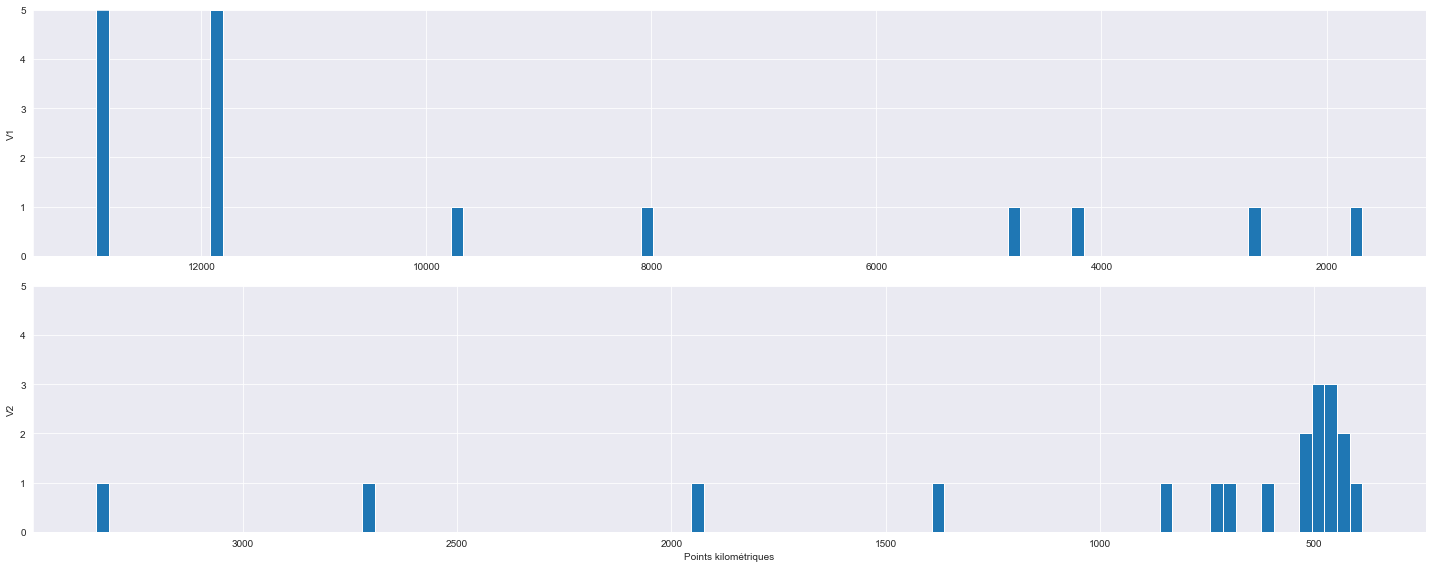

In [15]:
carrousel_1.trace_EB_by_KP()

### Répartition des freinages d'urgence dans le temps

Note TODO:
- améliorer la représentation du format date dans les label d'axe
- permettre de choisir la période de temps représentée

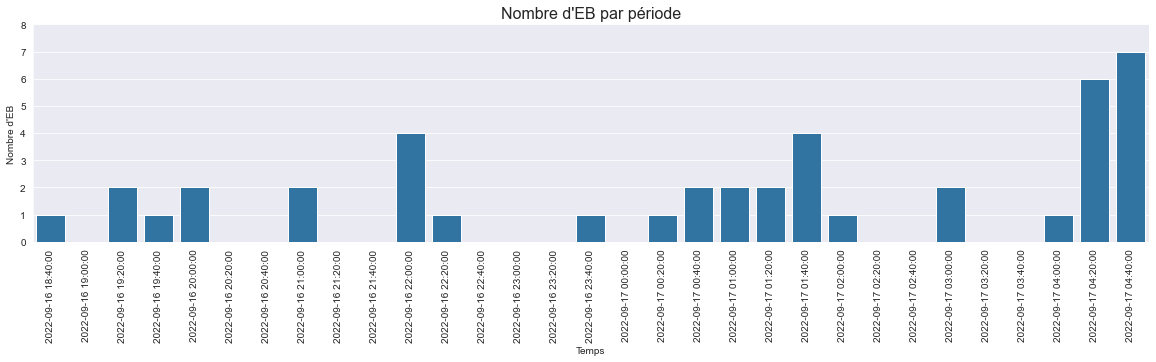

In [16]:
carrousel_1.trace_EB_by_time(ymax=8, bins='20T')

### Répartition des freinages d'urgence par cause d'EB

À FAIRE

## Corrélations

### Corrélation entre nombre de FU par interstation et écart entre temps de parcours moyen et mini

## Brouillons de code

In [ ]:
running_times = pd.concat([running_times_FIVP, running_times_RC4])
running_times

In [ ]:
fig = plt.figure(figsize=(16,4))

sns.barplot(data=running_times, x='mouvement', y='Duree_MVT', hue='Source')
plt.title("Temps de parcours moyen")
plt.xticks(rotation=90)
plt.show()

In [ ]:
delta_running_times = running_times_RC4.merge(running_times_FIVP, on='mouvement', left_index=True)
delta_running_times['delta'] = delta_running_times['Duree_MVT_y'] - delta_running_times['Duree_MVT_x']
delta_running_times = delta_running_times[['mouvement', 'delta']]

In [ ]:
delta_running_times = delta_running_times[delta_running_times['delta'] > -50]

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.barplot(data=delta_running_times, x='mouvement', y='delta', color='tab:blue',
           label=f"gain moyen par station: {delta_running_times['delta'].mean():.2f}s")
plt.title("Écart moyen de temps de parcours entre ATO Lot 3 RC4 sur site et FIVP 137B64",
         size=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.set_style()
sns.barplot(data=delta_running_times, x='mouvement', y='delta', hue='type_interstation', dodge=False)
plt.title("Écart moyen de temps de parcours entre ATO Lot 3 RC4 (mono-train) sur site et FIVP (40 trains) 137B64",
         size=16)
plt.xticks(rotation=90)
plt.ylabel('Delta temps de parcours')
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
delta_running_times_standard = delta_running_times[delta_running_times['type_interstation'] == 'Standard']
sns.barplot(data=delta_running_times_standard, x='mouvement', y='delta', color='tab:blue',
           label=f"gain moyen par station: {delta_running_times_standard['delta'].mean():.2f}s")
plt.title("Écart moyen de temps de parcours entre ATO Lot 3 RC4 (mono-train) sur site et FIVP 137B64 sur les interstation standard",
         size=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
tps_parcours = pd.read_excel('./tps_parcours_RC3_RC4.xlsx')
tps_parcours_137b64 = tps_parcours[['mouvement', '1.3.7.BETA64']].rename(columns={'1.3.7.BETA64': 'duree'})
tps_parcours_137b64['Version'] = '137b64_mono'

In [ ]:
fig = plt.figure(figsize=(16,16))
sns.barplot(data=tps_parcours_137b64, y='mouvement', x='duree', color='tab:blue', orient='h')

In [ ]:
running_times_FIVP = running_times_FIVP.rename(columns={'Duree_MVT': 'duree'})
running_times = pd.concat([running_times_FIVP, tps_parcours_137b64])
running_times[running_times['mouvement'] == "HEL1-MAR1"]

In [ ]:
fig = plt.figure(figsize=(16,4))

sns.barplot(data=running_times, x='mouvement', y='duree', hue='Version')
plt.title("Temps de parcours comparés mono vs multi trains en FIVP 137b64")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

In [ ]:
delta_running_times = tps_parcours_137b64.merge(running_times_FIVP, on='mouvement', left_index=True)
delta_running_times['delta'] = delta_running_times['duree_y'] - delta_running_times['duree_x']
delta_running_times = delta_running_times[['mouvement', 'delta']]

In [ ]:
# delta_running_times = delta_running_times[delta_running_times['delta'] > -50]

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.barplot(data=delta_running_times, x='mouvement', y='delta', color='tab:blue',
           label=f"gain moyen par station: {delta_running_times['delta'].mean():.2f}s")
plt.title("Écart moyen de temps de parcours entre mono train et multi trains FIVP 137b64",
         size=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
sns.set_style()
sns.barplot(data=delta_running_times, x='mouvement', y='delta', hue='type_interstation', dodge=False)
plt.title("Écart moyen de temps de parcours entre mono train et multi trains FIVP 137b64",
         size=16)
plt.xticks(rotation=90)
plt.ylabel('Delta temps de parcours')
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16,4))
delta_running_times_standard = delta_running_times[delta_running_times['type_interstation'] == 'Standard']
sns.barplot(data=delta_running_times_standard, x='mouvement', y='delta', color='tab:blue',
           label=f"perte moyenne par station: {delta_running_times_standard['delta'].mean():.2f}s")
plt.title("Écart moyen de temps de parcours entre mono train et multi trains FIVP 137b64 sur les interstation standard",
         size=16)
plt.xticks(rotation=90)
plt.legend()
plt.show()